In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [4]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [0]:
habermanDataset=pd.read_csv(io.BytesIO(uploaded['haberman.csv']))

In [6]:
habermanDataset.describe()

,Age,year,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
habermanDataset.columns

Index(['Age', 'year', 'positive_axillary_nodes', 'survival_status'], dtype='object')

PDF and Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


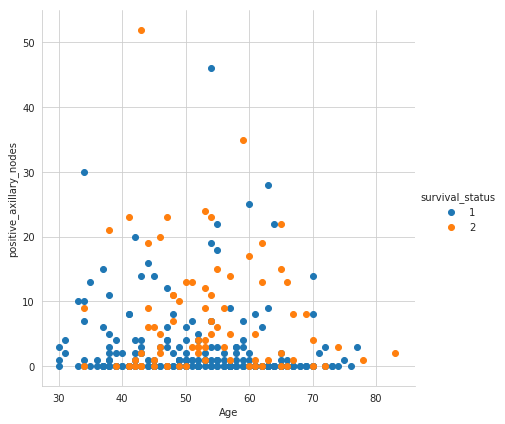

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(habermanDataset,hue="survival_status",size=6).map(plt.scatter,"Age","positive_axillary_nodes").add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


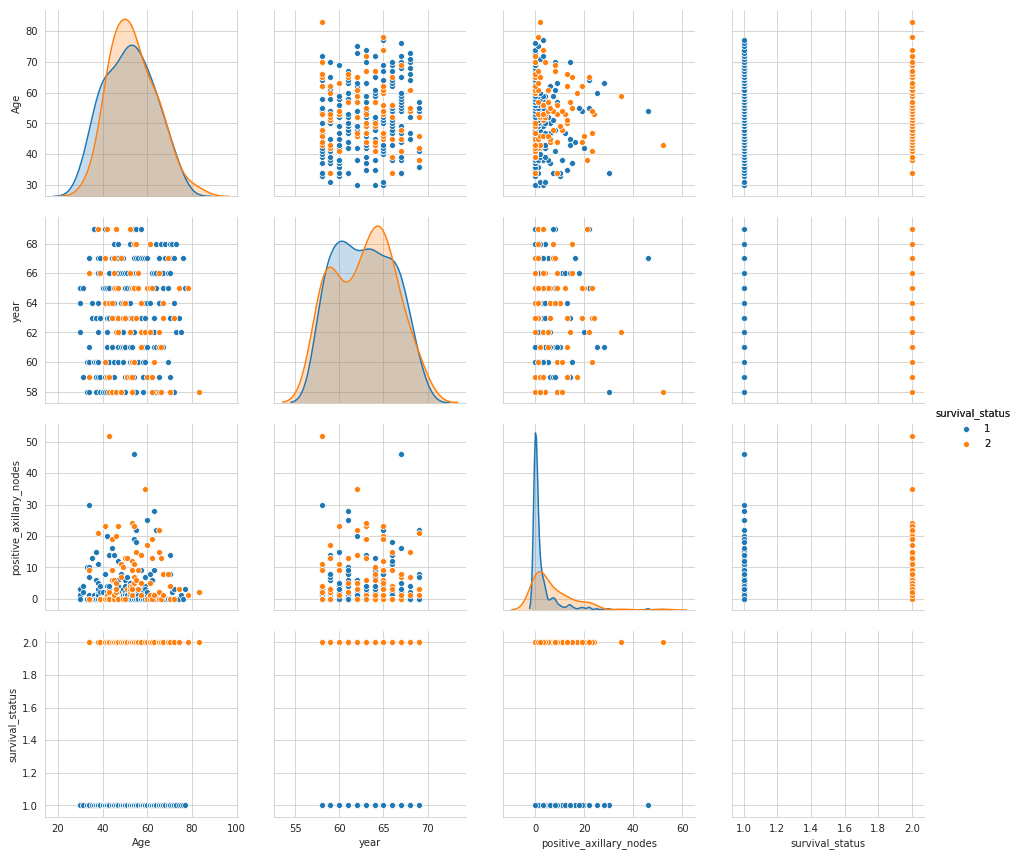

In [9]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(habermanDataset,hue='survival_status',size=3).add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


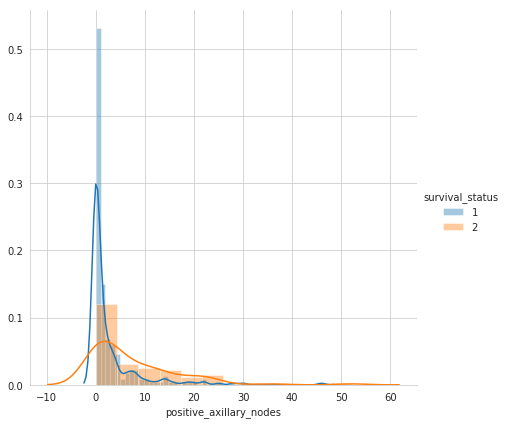

In [14]:
plt.close()
sns.FacetGrid(habermanDataset, hue = 'survival_status',size =6).map(sns.distplot,'positive_axillary_nodes').add_legend()
plt.show()

CDF 

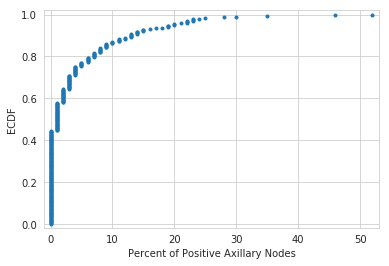

In [24]:
x=np.sort(habermanDataset['positive_axillary_nodes'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Percent of Positive Axillary Nodes')
plt.ylabel('ECDF')
plt.margins(0.02)  #keeps of margin edges
plt.show()

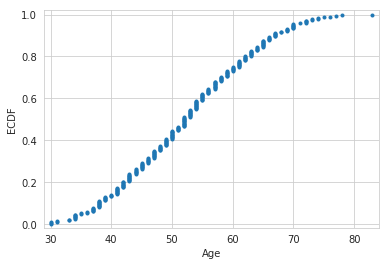

In [27]:
x=np.sort(habermanDataset['Age'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.margins(0.02)  #keeps of margin edges
plt.show()

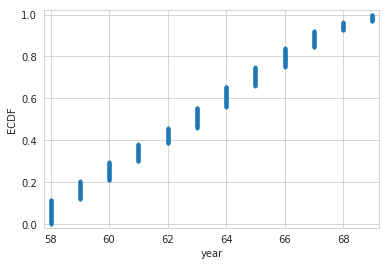

In [29]:
x=np.sort(habermanDataset['year'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('year')
plt.ylabel('ECDF')
plt.margins(0.02)  #keeps of margin edges
plt.show()

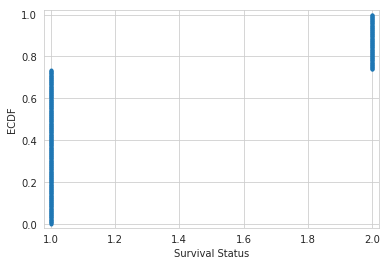

In [31]:
x=np.sort(habermanDataset['survival_status'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Survival Status')
plt.ylabel('ECDF')
plt.margins(0.02)  #keeps of margin edges
plt.show()

PDF:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
bin_edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


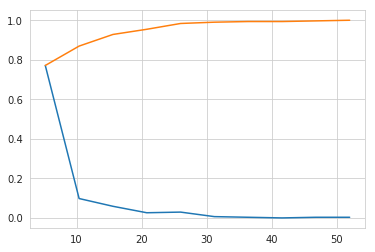

In [33]:
counts,bin_edges = np.histogram(habermanDataset['positive_axillary_nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
print("PDF: ",pdf)
print('bin_edges: ',bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()